# Simulation

Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from simulations import simulate_erp_components_with_conditions

Config

In [2]:
config = {
    'go_intercept': 0.2,
    'stop_intercept': 0.5,
    'response_intercept':
        {
            'error': 1,
            'correct_nostop':0.2
        },
    'interactions': {
        'stop x SSD': True,
        'response_error x SSD': True,
        'response_error x SRI': True,
    },
    'probability': {
        'stop': 0.3,
        'error': 0.5,

    },
    'sri': {'loc': 0.2, 'scale': 0.05}
}

# Parameters
n_trials_per_ssd = 100 
distances_C_A = np.arange(0.1, 0.4, 0.05)
sampling_rate = 64  
noise_level = 0
duration=1.5

In [3]:
# Simulate ERP components with conditions
erp_trials, data_df = simulate_erp_components_with_conditions(
    n_trials_per_ssd, 
    distances_C_A,
    config,
    sampling_rate, 
    noise_level,
    duration=duration,
)

Plot results

In [4]:
data_df.head()

,signal,SSD,SRI,Go amplitude,Stop amplitude,Response amplitude,Go event latency,Stop event latency,Response event latency,stop_type,response_type,rt
0,"[0.027067623002209804, 0.036548642989948366, 0...",NaN,NaN,0.2,NaN,0.200000,6,NaN,25.0,nostop,nostop_correct,0.305462
1,"[0.02706786744517134, 0.03654915534569837, 0.0...",NaN,NaN,0.2,NaN,0.200000,6,NaN,25.0,nostop,nostop_correct,0.298313
2,"[0.033957925619924674, 0.04742739946712449, 0....",0.1,0.209608,0.2,0.62,1.434413,6,12.0,26.0,stop,error,0.409608
3,"[0.03395463450103277, 0.047420190802214775, 0....",0.1,NaN,0.2,0.62,NaN,6,12.0,NaN,stop,correct,NaN
4,"[0.03399884946523505, 0.04750904431292179, 0.0...",0.1,0.154485,0.2,0.62,1.351727,6,12.0,22.0,stop,error,0.354485


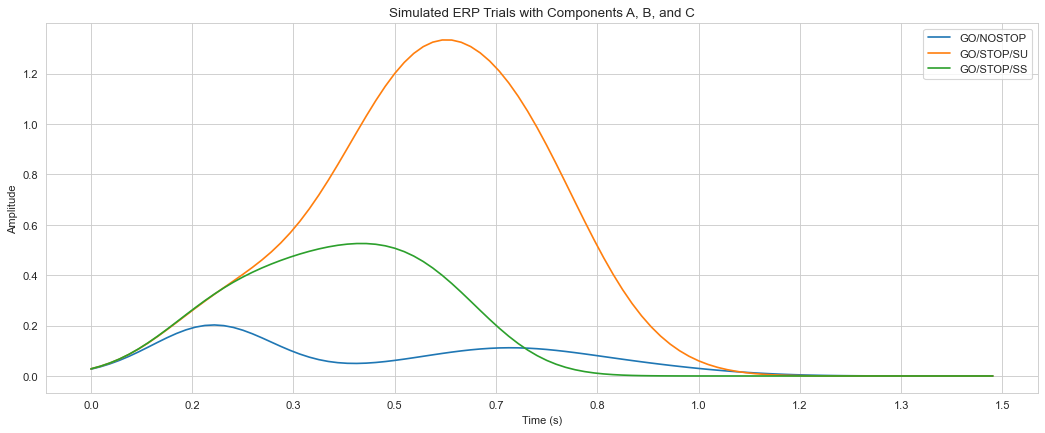

Correlation between STOP amplitude and SSD distance: PearsonRResult(statistic=1.0, pvalue=0.0)
Correlation between RESPONSE amplitude and SRI distance: PearsonRResult(statistic=0.5544807500376663, pvalue=1.2821803061736652e-10)


In [8]:
x_nostop = data_df[data_df['response_type'] == 'nostop_correct']['signal'].to_numpy().mean(axis=0)
x_error = data_df[data_df['response_type'] == 'error']['signal'].to_numpy().mean(axis=0)
x_correct = data_df[data_df['response_type'] == 'correct']['signal'].to_numpy().mean(axis=0)

plt.figure(figsize=(16, 6), dpi=80)

plt.plot(x_nostop, label = 'GO/NOSTOP')
plt.plot(x_error, label = 'GO/STOP/SU')
plt.plot(x_correct, label = 'GO/STOP/SS')

plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Simulated ERP Trials with Components A, B, and C')
plt.legend()

# Set x-axis labels from 0 to duration, repeated for each trial
xticks_single = np.linspace(0, duration, 10)
plt.xticks(xticks_single * sampling_rate, [f'{xt:.1f}' for xt in xticks_single])
plt.xlabel('Time (s)')

plt.show()

stop_amplitudes = data_df['Stop amplitude'].dropna().to_numpy()
ssds = data_df['SSD'].dropna().to_numpy()
response_amplitudes = data_df[data_df['response_type'] == 'error']['Response amplitude'].to_numpy()
sris = data_df['SRI'].dropna().to_numpy()


print(f'Correlation between STOP amplitude and SSD distance: {pearsonr(stop_amplitudes, ssds)}')
print(f'Correlation between RESPONSE amplitude and SRI distance: {pearsonr(response_amplitudes, sris)}')

Plot single-trials

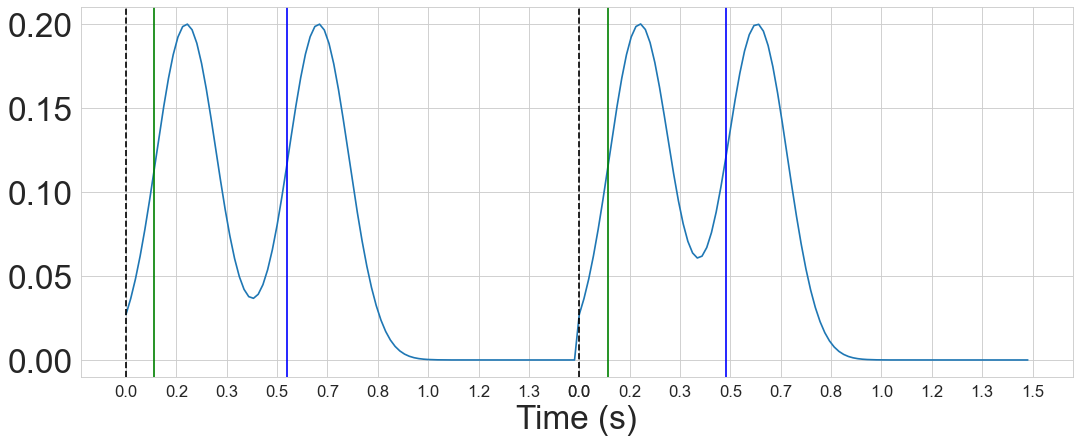

In [9]:
# Set global font size for various elements
plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 15,
    'ytick.labelsize': 30,
    'legend.fontsize': 25,
    'figure.titlesize': 25,
})

raws = np.ravel(erp_trials)
n_trials_to_plot = 2
start = 10
offset = int(duration * sampling_rate)

plt.figure(figsize=(16, 6), dpi=80)
plt.plot(raws[start*offset:(start+n_trials_to_plot)*offset])

for i in np.arange(0, n_trials_to_plot):
    go_latency = data_df.iloc[start+i]['Go event latency'] + i*offset
    stop_latency = data_df.iloc[start+i]['Stop event latency'] + i*offset
    response_latency = data_df.iloc[start+i]['Response event latency'] + i*offset

    plt.axvline(x=go_latency, color="green")
    plt.axvline(x=stop_latency, color="red")
    plt.axvline(x=response_latency, color="blue")

    plt.axvline(x=i*offset, color="black", linestyle='--')

# Set x-axis labels from 0 to duration, repeated for each trial
xticks_single = np.linspace(0, duration, 10)
xticks_all_trials = np.concatenate([xticks_single + i * duration for i in range(n_trials_to_plot)])
plt.xticks(xticks_all_trials * sampling_rate, [f'{xt:.1f}' for xt in np.tile(xticks_single, n_trials_to_plot)])
plt.xlabel('Time (s)')

plt.show()

Plor UN single trials

In [10]:
unsucc_data_df = data_df[data_df['response_type'] == 'error']
unsucc_data_df.head()

,signal,SSD,SRI,Go amplitude,Stop amplitude,Response amplitude,Go event latency,Stop event latency,Response event latency,stop_type,response_type,rt
0,"[0.033959651021972855, 0.04743103340906952, 0....",0.1,0.201090,0.2,0.62,1.421636,6,12.0,25.0,stop,error,0.401090
1,"[0.03396041493393618, 0.04743262806444585, 0.0...",0.1,0.198192,0.2,0.62,1.417288,6,12.0,25.0,stop,error,0.398192
7,"[0.033960978306947075, 0.04743379952906118, 0....",0.1,0.196281,0.2,0.62,1.414422,6,12.0,25.0,stop,error,0.396281
15,"[0.033964875069973914, 0.047441819515777986, 0...",0.1,0.186318,0.2,0.62,1.399477,6,12.0,24.0,stop,error,0.386318
23,"[0.03395507140745927, 0.04742120777777794, 0.0...",0.1,0.248529,0.2,0.62,1.492793,6,12.0,28.0,stop,error,0.448529


Text(0.5, 0, 'Time (s)')

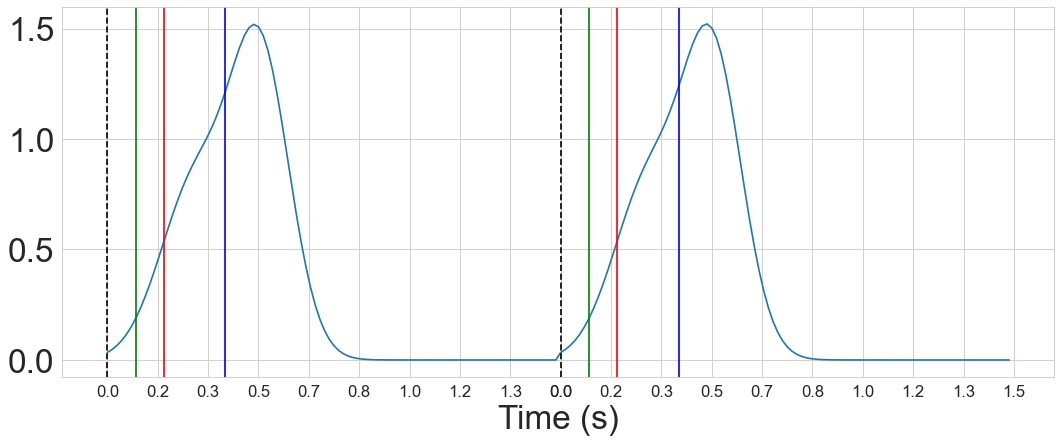

In [11]:
# Set global font size for various elements
plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 15,
    'ytick.labelsize': 30,
    'legend.fontsize': 25,
    'figure.titlesize': 25,
})

start = 0
offset = int(duration * sampling_rate)

data = np.concatenate(unsucc_data_df.iloc[start:start+n_trials_to_plot]['signal'].to_numpy())
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(data)
# 
for i in np.arange(0, n_trials_to_plot):
    go_latency = unsucc_data_df.iloc[start+i]['Go event latency'] + i*offset
    stop_latency = unsucc_data_df.iloc[start+i]['Stop event latency'] + i*offset
    response_latency = unsucc_data_df.iloc[start+i]['Response event latency'] + i*offset

    plt.axvline(x=go_latency, color="green")
    plt.axvline(x=stop_latency, color="red")
    plt.axvline(x=response_latency, color="blue")

    plt.axvline(x=i*offset, color="black", linestyle='--')

# Set x-axis labels from 0 to duration, repeated for each trial
xticks_single = np.linspace(0, duration, 10)
xticks_all_trials = np.concatenate([xticks_single + i * duration for i in range(n_trials_to_plot)])
plt.xticks(xticks_all_trials * sampling_rate, [f'{xt:.1f}' for xt in np.tile(xticks_single, n_trials_to_plot)])
plt.xlabel('Time (s)')

## Create events dataset

In [12]:
rows = []

# Iterate through the input DataFrame and populate the list
for idx, row in data_df.iterrows():
    signal_offset = idx * int(duration*sampling_rate)

    # Add each event to the list with the appropriate latency and event type
    rows.append({
        'latency': signal_offset + row['Go event latency'], 
        'event': 'go', 
        'SSD': row['SSD'] if pd.notna(row['Go event latency']) else np.nan, 
        'SRI': row['SRI'] if pd.notna(row['Go event latency']) else np.nan,
        'response_type': row['response_type']
    })

    if pd.notna(row['Stop event latency']):
        rows.append({
            'latency': signal_offset + row['Stop event latency'],
            'event': 'stop',
            'SSD': row['SSD'],
            'SRI': row['SRI'] if pd.notna(row['Response event latency']) else np.nan,
            'response_type': row['response_type']
        })

        if pd.notna(row['Response event latency']):
            rows.append({
                'latency': signal_offset + row['Response event latency'],
                'event': 'response',
                'SSD': row['SSD'],
                'SRI': row['SRI'],
                'response_type': row['response_type']
            })
    else:
        rows.append({
            'latency': signal_offset + row['Response event latency'],
            'event': 'response_nostop',
            'SSD': np.nan,
            'SRI': np.nan,
            'response_type': row['response_type']
        })  

# Create a new DataFrame from the list
events_df = pd.DataFrame(rows)
events_df_notna = events_df.fillna(0.0, inplace=False)

display(events_df.head())
display(events_df_notna.head())

,latency,event,SSD,SRI,response_type
0,6.0,go,0.1,0.201090,error
1,12.0,stop,0.1,0.201090,error
2,25.0,response,0.1,0.201090,error
3,102.0,go,0.1,0.198192,error
4,108.0,stop,0.1,0.198192,error


,latency,event,SSD,SRI,response_type
0,6.0,go,0.1,0.201090,error
1,12.0,stop,0.1,0.201090,error
2,25.0,response,0.1,0.201090,error
3,102.0,go,0.1,0.198192,error
4,108.0,stop,0.1,0.198192,error


In [13]:
# Center continuous columns
ssd_mean = np.nanmean(events_df_notna['SSD'])
events_df_notna['ssd_centered'] = events_df_notna['SSD'] - ssd_mean

sri_mean = np.nanmean(events_df_notna['SRI'])
events_df_notna['sri_centered'] = events_df_notna['SRI'] - sri_mean

# Center continuous columns
ssd_mean = np.nanmean(events_df['SSD'])
events_df['ssd_centered'] = events_df['SSD'] - ssd_mean

sri_mean = np.nanmean(events_df['SRI'])
events_df['sri_centered'] = events_df['SRI'] - sri_mean

## Perform unfolding

In [14]:
# Import the Julia package manager
from juliacall import Pkg as jlPkg

# Activate the environment in the current folder
jlPkg.activate(".")

# Check the status of the environment/installed packages -> will be empty at the beginning
print(jlPkg.status())

# Install Julia packages
jlPkg.add("Unfold")
jlPkg.add("DataFrames")
jlPkg.add(url="https://github.com/unfoldtoolbox/UnfoldDecode.jl")

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/Projects/neuroNoodle/notebooks`


Status `~/Projects/neuroNoodle/notebooks/Project.toml`
  [a93c6f00] DataFrames v1.6.1
  [181c99d8] Unfold v0.7.5
None
  [ec0f67a1] UnfoldDecode v0.1.0 `https://github.com/unfoldtoolbox/UnfoldDecode.jl#main`


   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/notebooks/Project.toml`
  No Changes to `~/Projects/neuroNoodle/notebooks/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/notebooks/Project.toml`
  No Changes to `~/Projects/neuroNoodle/notebooks/Manifest.toml`
    Updating git-repo `https://github.com/unfoldtoolbox/UnfoldDecode.jl`
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/notebooks/Project.toml`
  No Changes to `~/Projects/neuroNoodle/notebooks/Manifest.toml`


In [15]:
from juliacall import Main as jl

# The function seval() can be used to evaluate a piece of Julia code given as a string
jl.seval("using DataFrames")
jl.seval("using Unfold")
jl.seval("using UnfoldDecode")
Unfold = jl.Unfold
UnfoldDecode = jl.UnfoldDecode

### Define Unfold model

In [25]:
events_df

,latency,event,SSD,SRI,response_type,ssd_centered,sri_centered
0,6.0,go,0.1,0.201090,error,-0.140367,0.003129
1,12.0,stop,0.1,0.201090,error,-0.140367,0.003129
2,25.0,response,0.1,0.201090,error,-0.140367,0.003129
3,102.0,go,0.1,0.198192,error,-0.140367,0.000230
4,108.0,stop,0.1,0.198192,error,-0.140367,0.000230
...,...,...,...,...,...,...,...
1510,66971.0,response_nostop,NaN,NaN,nostop_correct,NaN,NaN
1511,67014.0,go,NaN,NaN,nostop_correct,NaN,NaN
1512,67056.0,response_nostop,NaN,NaN,nostop_correct,NaN,NaN
1513,67110.0,go,NaN,NaN,nostop_correct,NaN,NaN


In [30]:
# Specify model formula
df = events_df_notna

bf_go = jl.seval("bf_go = firbasis(τ = (-0.2, 0.5), sfreq = 64)")
bf_stop= jl.seval("bf_stop = firbasis(τ = (-0.2, 0.5), sfreq = 64)")
bf_response = jl.seval("bf_response = firbasis(τ = (-0.1, 0.6), sfreq = 64)")
bf_response_nostop = jl.seval("bf_response_nostop = firbasis(τ = (0-0.1, 0.6), sfreq = 64)")

formula_go = jl.seval("f_go = @formula 0 ~ 1")
formula_stop = jl.seval("f_stop = @formula 0 ~ 1 + ssd_centered")
formula_res = jl.seval("f_response = @formula 0 ~ 1 + sri_centered + ssd_centered")
formula_res_nostop = jl.seval("f_response_nostop = @formula 0 ~ 1")


bfDict = jl.seval("[ \"go\" => (f_go, bf_go), \"stop\" => (f_stop, bf_stop),  \"response\" => (f_response, bf_response), \"response_nostop\" => (f_response_nostop, bf_response_nostop)]")

# Convert the Python columns to Julia arrays
type_column = jl.seval("Vector{String}")(df['event'].tolist())
response_type_column = jl.seval("Vector{String}")(df['response_type'].tolist())
ssd_centered_column = jl.seval("Vector{Float64}")(df['ssd_centered'].tolist())
sri_centered_column = jl.seval("Vector{Float64}")(df['sri_centered'].tolist())
latency_column = jl.seval("Vector{Int64}")(df['latency'].tolist())

# Create the Julia DataFrame
events_df_jl = jl.DataFrame(
    type=type_column, 
    latency=latency_column, 
    ssd_centered=ssd_centered_column, 
    sri_centered=sri_centered_column, 
    response_type=response_type_column
)

raws = np.ravel(erp_trials)

# Fit Unfold model
m = Unfold.fit(
    Unfold.UnfoldModel,
    bfDict,
    events_df_jl,
    raws,
    eventcolumn = "type",
)
model_matrix = Unfold.modelmatrix(m)
design_matrix = Unfold.designmatrix(m)

### Extract results

In [31]:
def jl_results_to_python(results_jl):
    results_py_df = pd.DataFrame({
        'channel': results_jl.channel,
        'coefname': results_jl.coefname,
        'estimate': results_jl.estimate,
        'eventname': results_jl.eventname,
        'group': results_jl.group,
        'stderror': results_jl.stderror,
        'time': results_jl.time
    })
    return results_py_df

In [32]:
results_jl = Unfold.coeftable(m)
results_py = jl_results_to_python(results_jl)
results_py

,channel,coefname,estimate,eventname,group,stderror,time
0,1,(Intercept),1.131961e-07,go,None,None,-0.203125
1,1,(Intercept),8.313879e-09,go,None,None,-0.187500
2,1,(Intercept),-4.094778e-08,go,None,None,-0.171875
3,1,(Intercept),-6.149403e-08,go,None,None,-0.156250
4,1,(Intercept),-5.294566e-08,go,None,None,-0.140625
...,...,...,...,...,...,...,...
313,1,(Intercept),5.052456e-05,response_nostop,None,None,0.531250
314,1,(Intercept),2.759412e-05,response_nostop,None,None,0.546875
315,1,(Intercept),1.511400e-05,response_nostop,None,None,0.562500
316,1,(Intercept),1.045067e-05,response_nostop,None,None,0.578125


#### Plot results

- Centered, NaNa

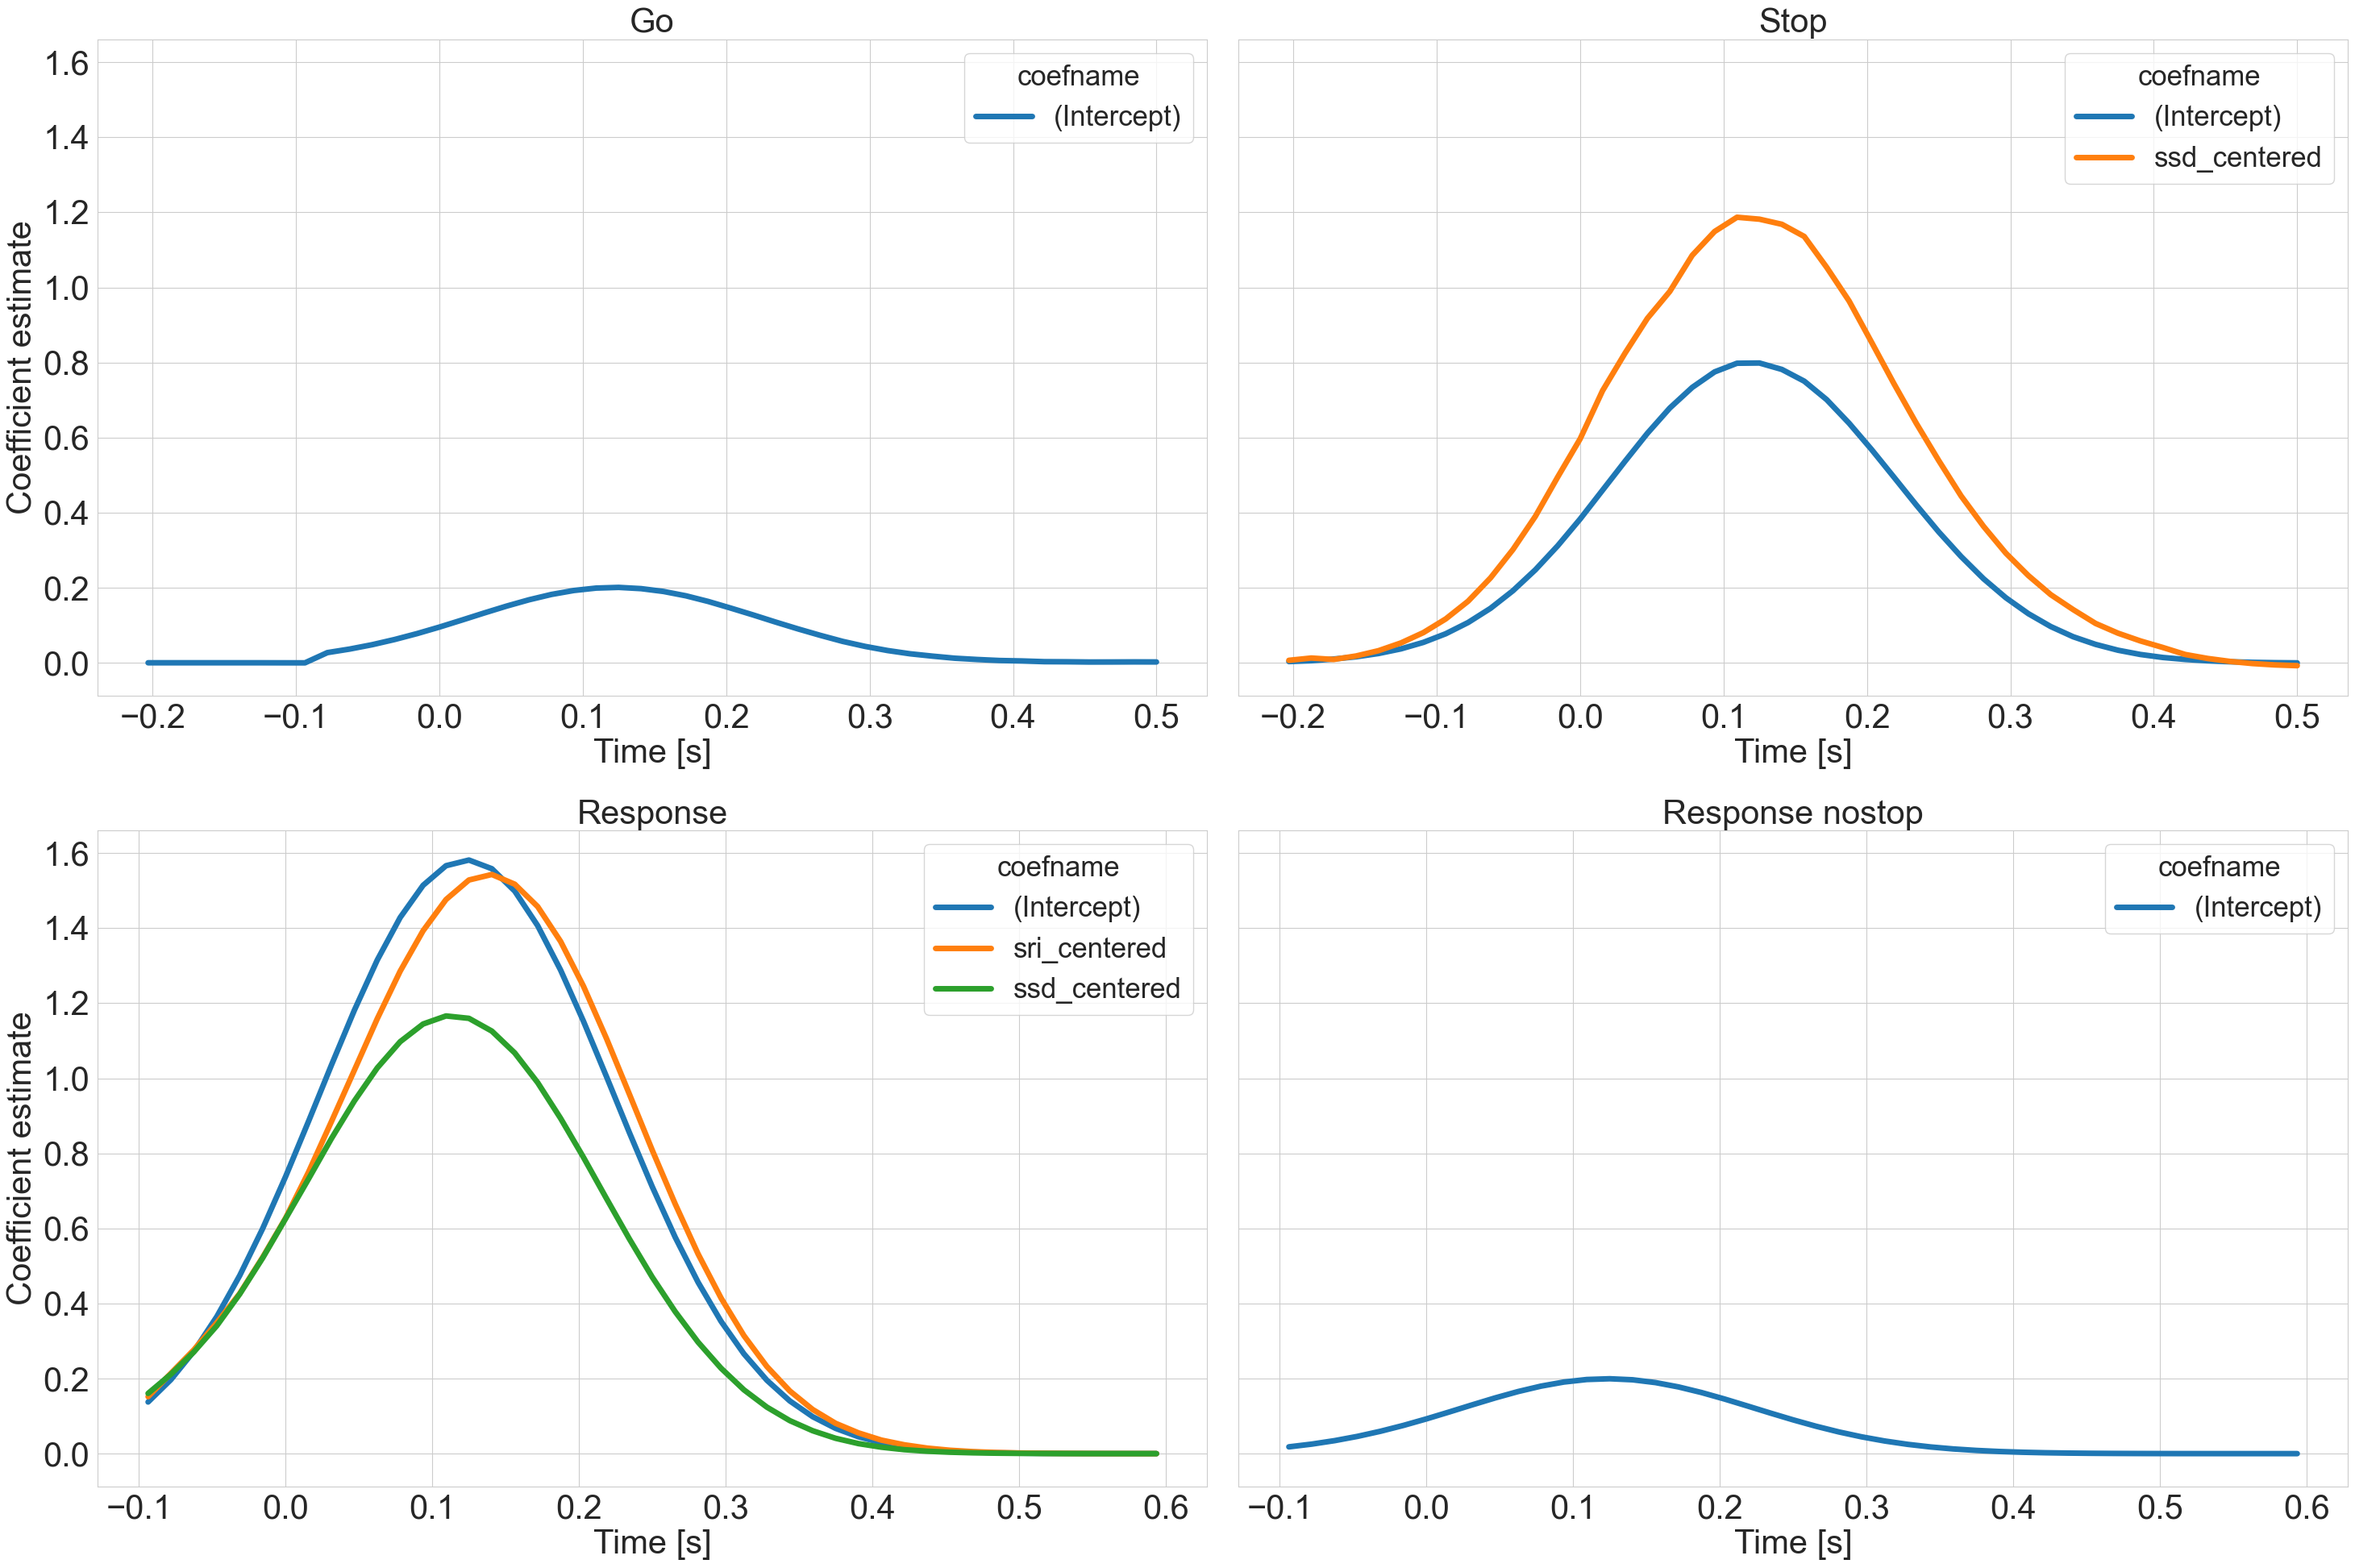

In [29]:
# Extract the coefficients for one channel
results_channel = results_py[results_py.channel == 1]

results_go = results_channel[results_channel.eventname == 'go']
results_stop = results_channel[results_channel.eventname == 'stop']
results_response = results_channel[results_channel.eventname == 'response']
results_response_nostop = results_channel[results_channel.eventname == 'response_nostop']

sns.set_style("whitegrid")

# Set global font size for various elements
plt.rcParams.update({
    'font.size': 25,          
    'axes.titlesize': 30,     
    'axes.labelsize': 30,    
    'xtick.labelsize': 30,   
    'ytick.labelsize': 30, 
    'legend.fontsize': 25, 
    'figure.titlesize': 25,
})
linewidth = 5
# Plot the coefficient estimates over time
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20), sharey=True)

ax1 = sns.lineplot(
    x = results_go.time,
    y=results_go.estimate,
    hue=results_go.coefname,
    ax=ax1,
    linewidth=linewidth
)
ax1.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Go')

ax2 = sns.lineplot(
    x = results_stop.time,
    y=results_stop.estimate,
    hue=results_stop.coefname,
    ax=ax2,
    linewidth=linewidth
)
ax2.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Stop')

ax3 = sns.lineplot(
    x = results_response.time,
    y=results_response.estimate,
    hue=results_response.coefname,
    ax=ax3,
    linewidth=linewidth
)
ax3.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Response')

ax4 = sns.lineplot(
    x = results_response_nostop.time,
    y=results_response_nostop.estimate,
    hue=results_response_nostop.coefname,
    ax=ax4,
    linewidth=linewidth
)
ax4.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Response nostop')


plt.tight_layout()
plt.show()

- Centered, NaNs filled with zero before centering

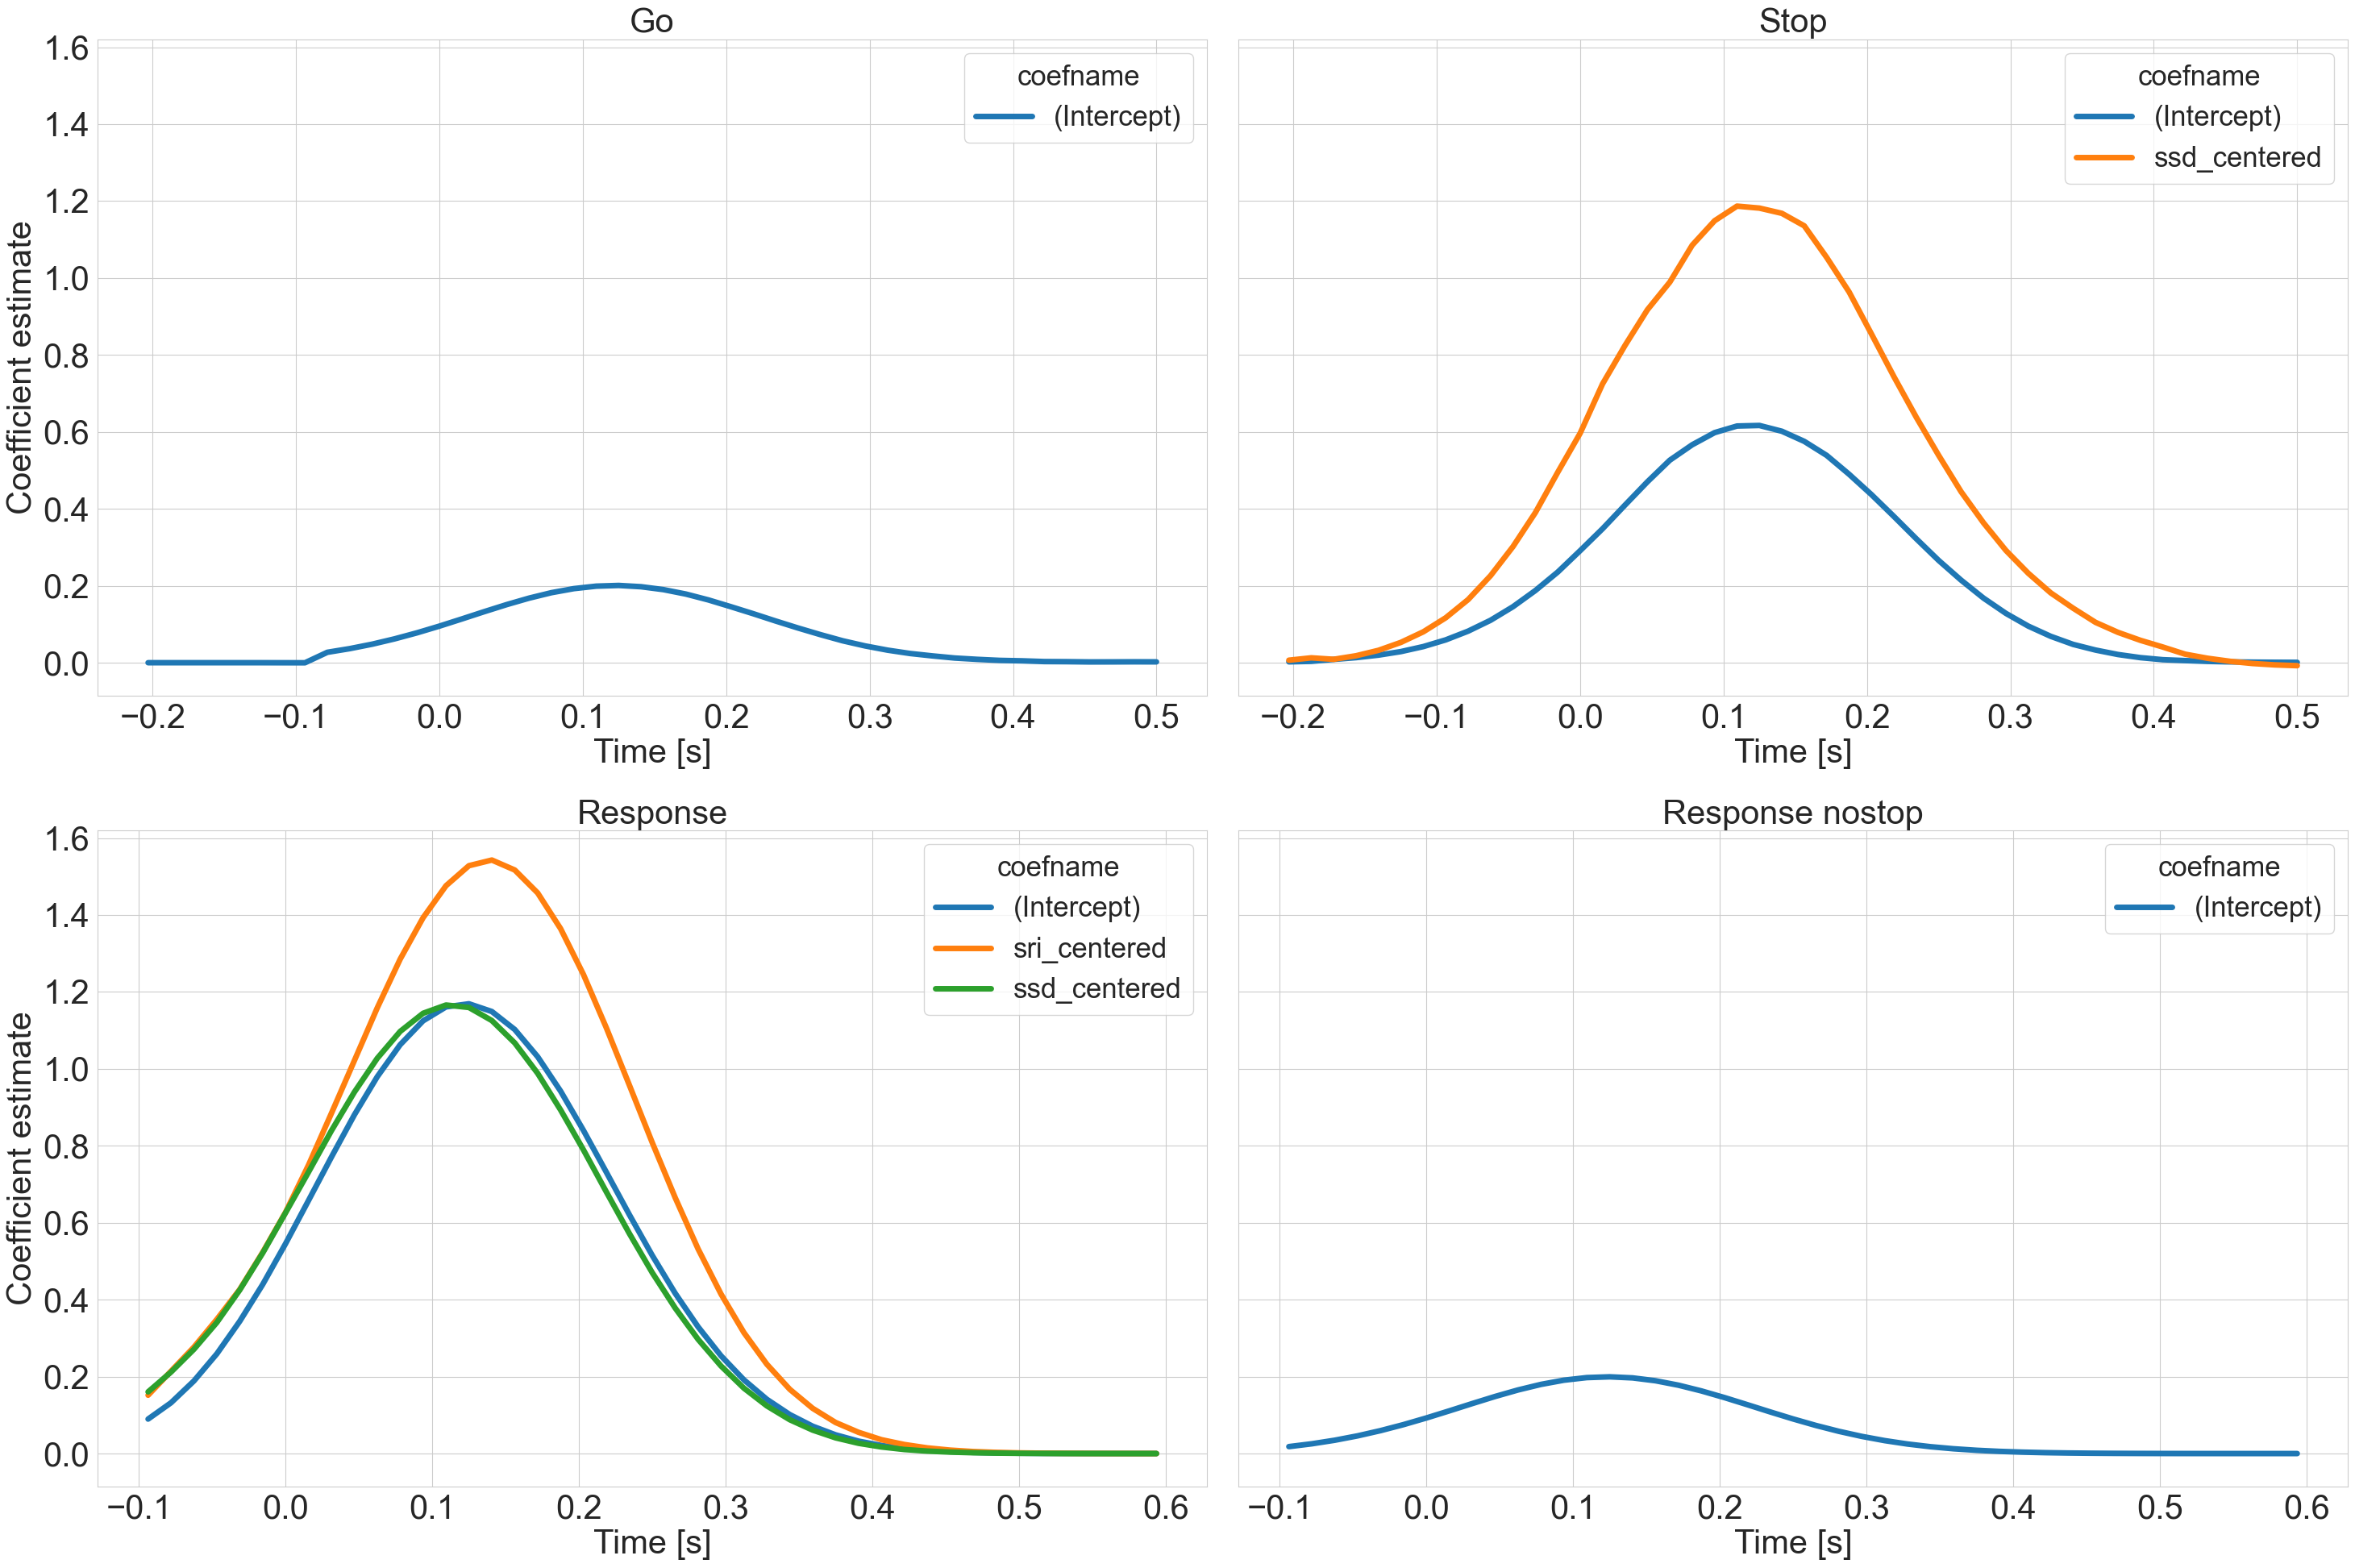

In [33]:
# Extract the coefficients for one channel
results_channel = results_py[results_py.channel == 1]

results_go = results_channel[results_channel.eventname == 'go']
results_stop = results_channel[results_channel.eventname == 'stop']
results_response = results_channel[results_channel.eventname == 'response']
results_response_nostop = results_channel[results_channel.eventname == 'response_nostop']

sns.set_style("whitegrid")

# Set global font size for various elements
plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'legend.fontsize': 25,
    'figure.titlesize': 25,
})
linewidth = 5
# Plot the coefficient estimates over time
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20), sharey=True)

ax1 = sns.lineplot(
    x = results_go.time,
    y=results_go.estimate,
    hue=results_go.coefname,
    ax=ax1,
    linewidth=linewidth
)
ax1.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Go')

ax2 = sns.lineplot(
    x = results_stop.time,
    y=results_stop.estimate,
    hue=results_stop.coefname,
    ax=ax2,
    linewidth=linewidth
)
ax2.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Stop')

ax3 = sns.lineplot(
    x = results_response.time,
    y=results_response.estimate,
    hue=results_response.coefname,
    ax=ax3,
    linewidth=linewidth
)
ax3.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Response')

ax4 = sns.lineplot(
    x = results_response_nostop.time,
    y=results_response_nostop.estimate,
    hue=results_response_nostop.coefname,
    ax=ax4,
    linewidth=linewidth
)
ax4.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Response nostop')


plt.tight_layout()
plt.show()

- Non-centered, Nans

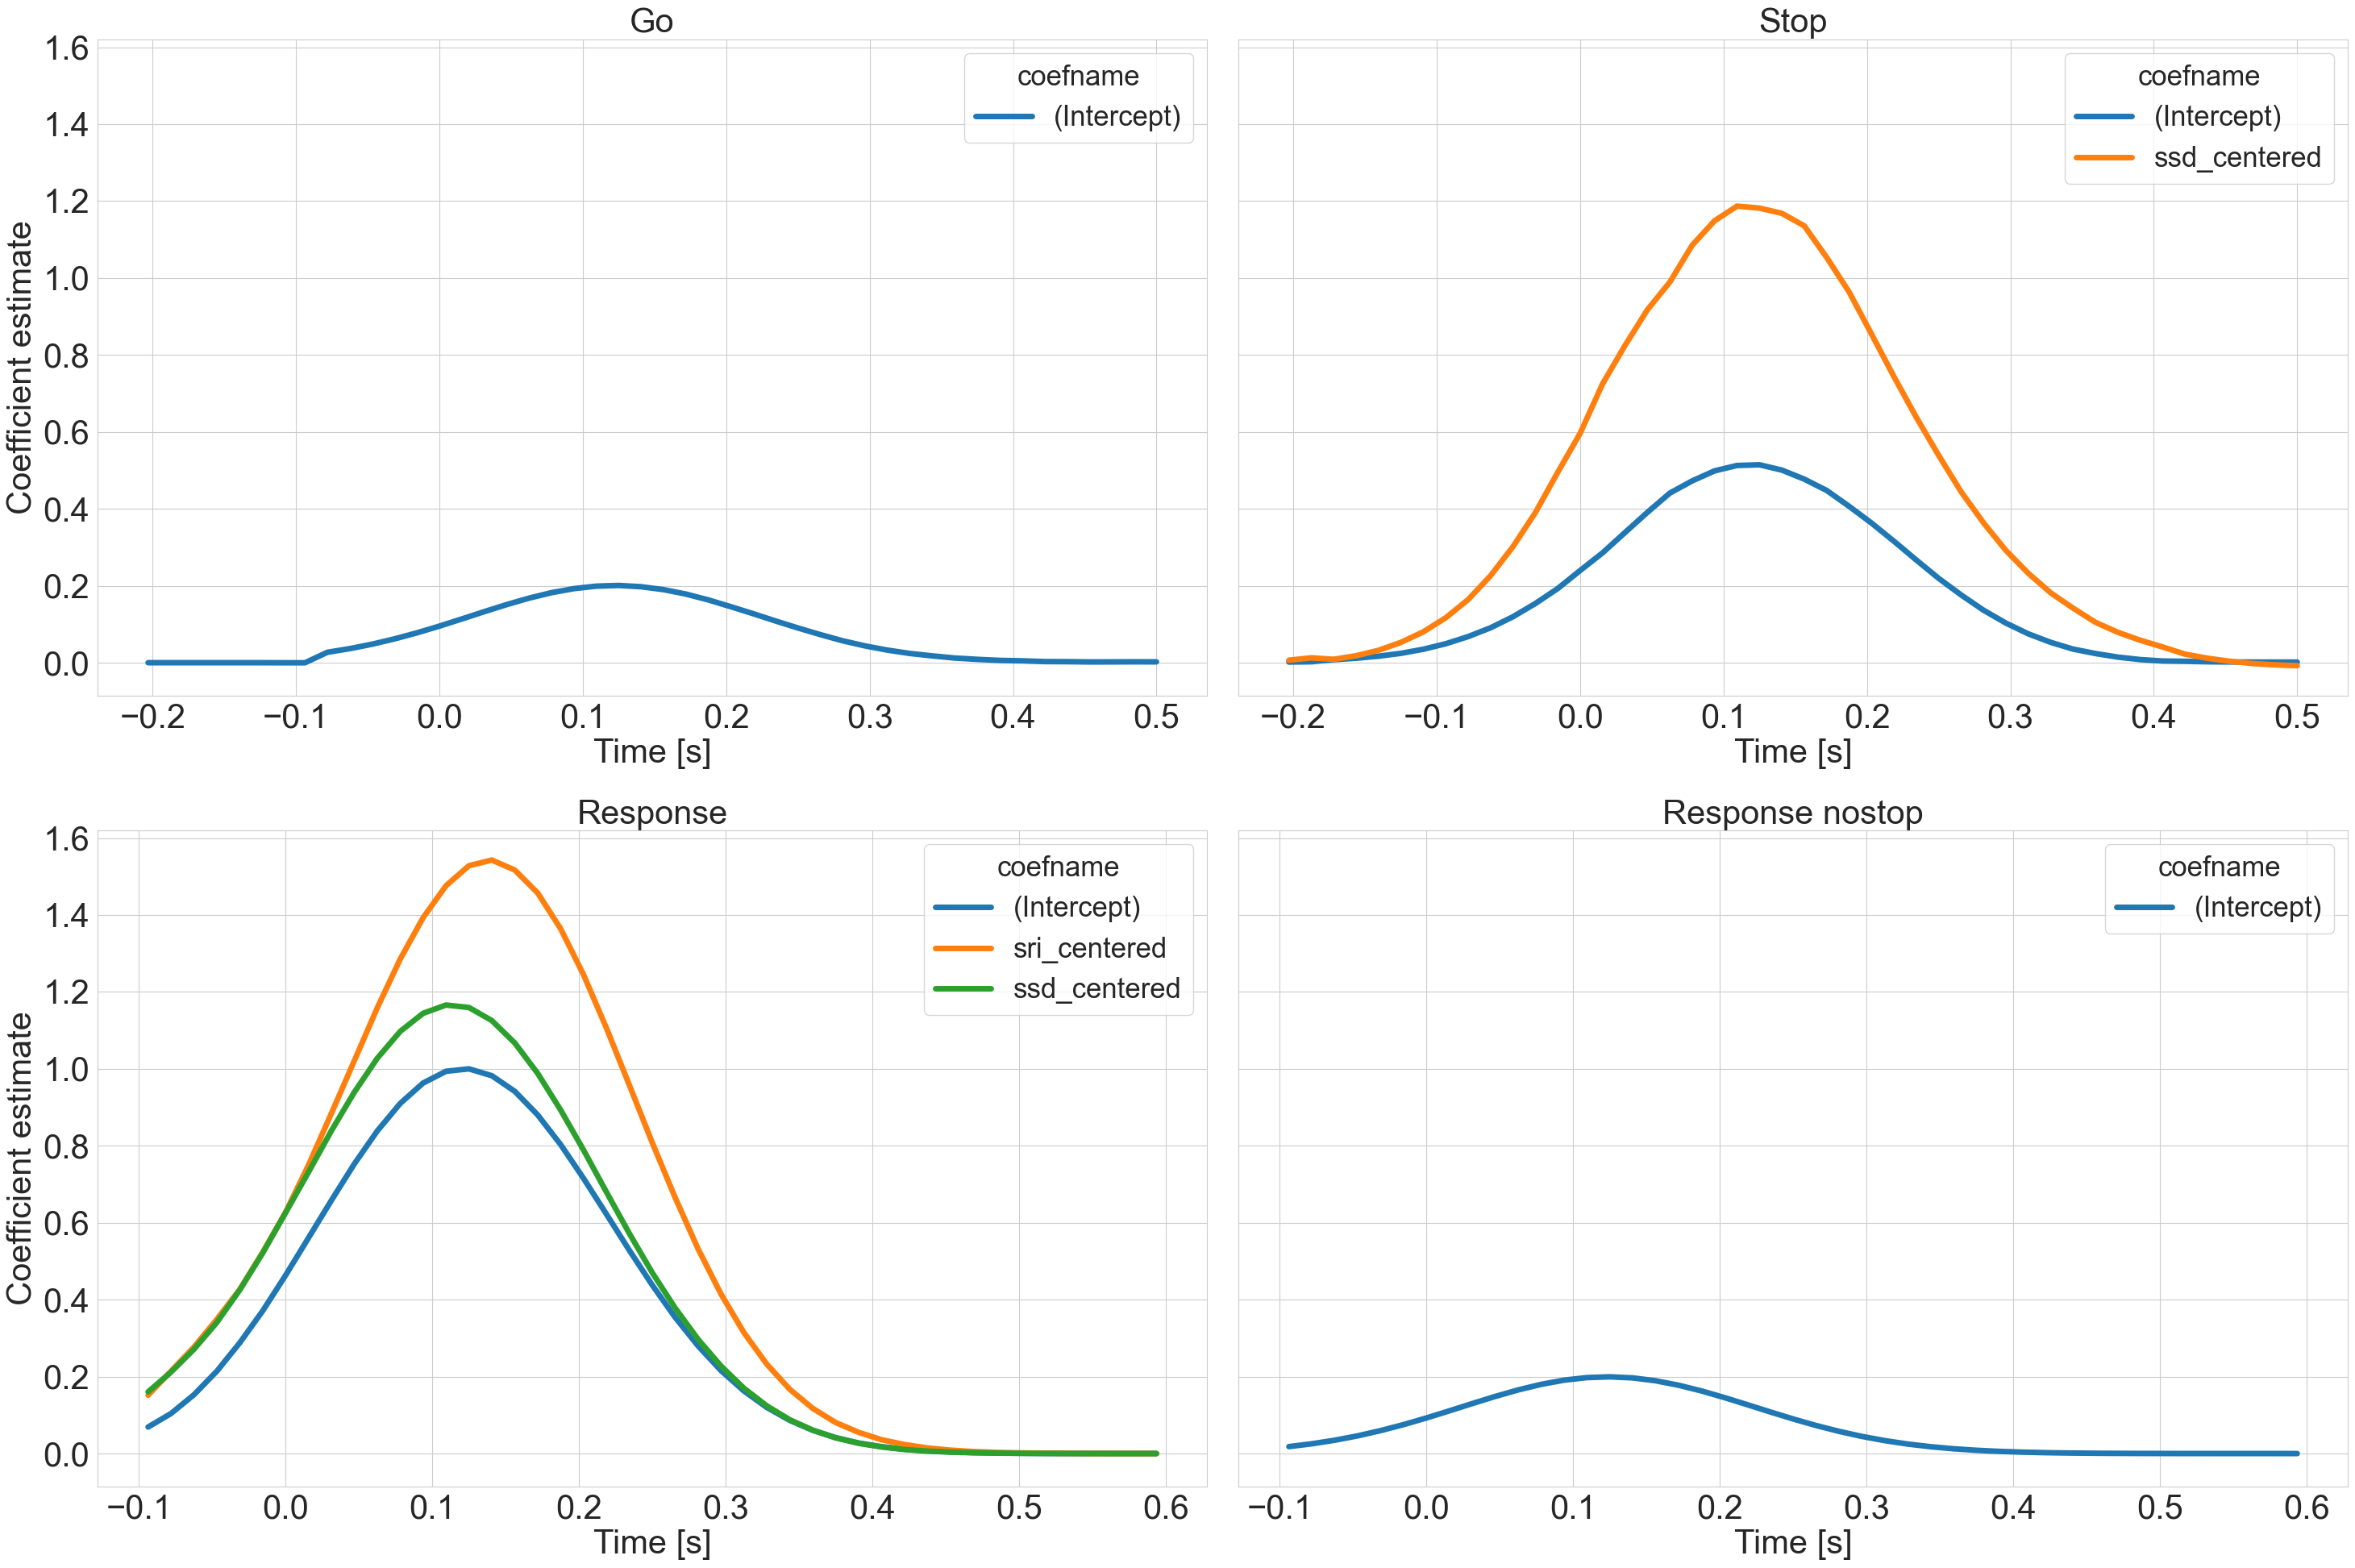

In [24]:
# Extract the coefficients for one channel
results_channel = results_py[results_py.channel == 1]

results_go = results_channel[results_channel.eventname == 'go']
results_stop = results_channel[results_channel.eventname == 'stop']
results_response = results_channel[results_channel.eventname == 'response']
results_response_nostop = results_channel[results_channel.eventname == 'response_nostop']

sns.set_style("whitegrid")

# Set global font size for various elements
plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'legend.fontsize': 25,
    'figure.titlesize': 25,
})
linewidth = 5
# Plot the coefficient estimates over time
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20), sharey=True)

ax1 = sns.lineplot(
    x = results_go.time,
    y=results_go.estimate,
    hue=results_go.coefname,
    ax=ax1,
    linewidth=linewidth
)
ax1.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Go')

ax2 = sns.lineplot(
    x = results_stop.time,
    y=results_stop.estimate,
    hue=results_stop.coefname,
    ax=ax2,
    linewidth=linewidth
)
ax2.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Stop')

ax3 = sns.lineplot(
    x = results_response.time,
    y=results_response.estimate,
    hue=results_response.coefname,
    ax=ax3,
    linewidth=linewidth
)
ax3.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Response')

ax4 = sns.lineplot(
    x = results_response_nostop.time,
    y=results_response_nostop.estimate,
    hue=results_response_nostop.coefname,
    ax=ax4,
    linewidth=linewidth
)
ax4.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Response nostop')


plt.tight_layout()
plt.show()

- Non-centered, NaNs filled with zero

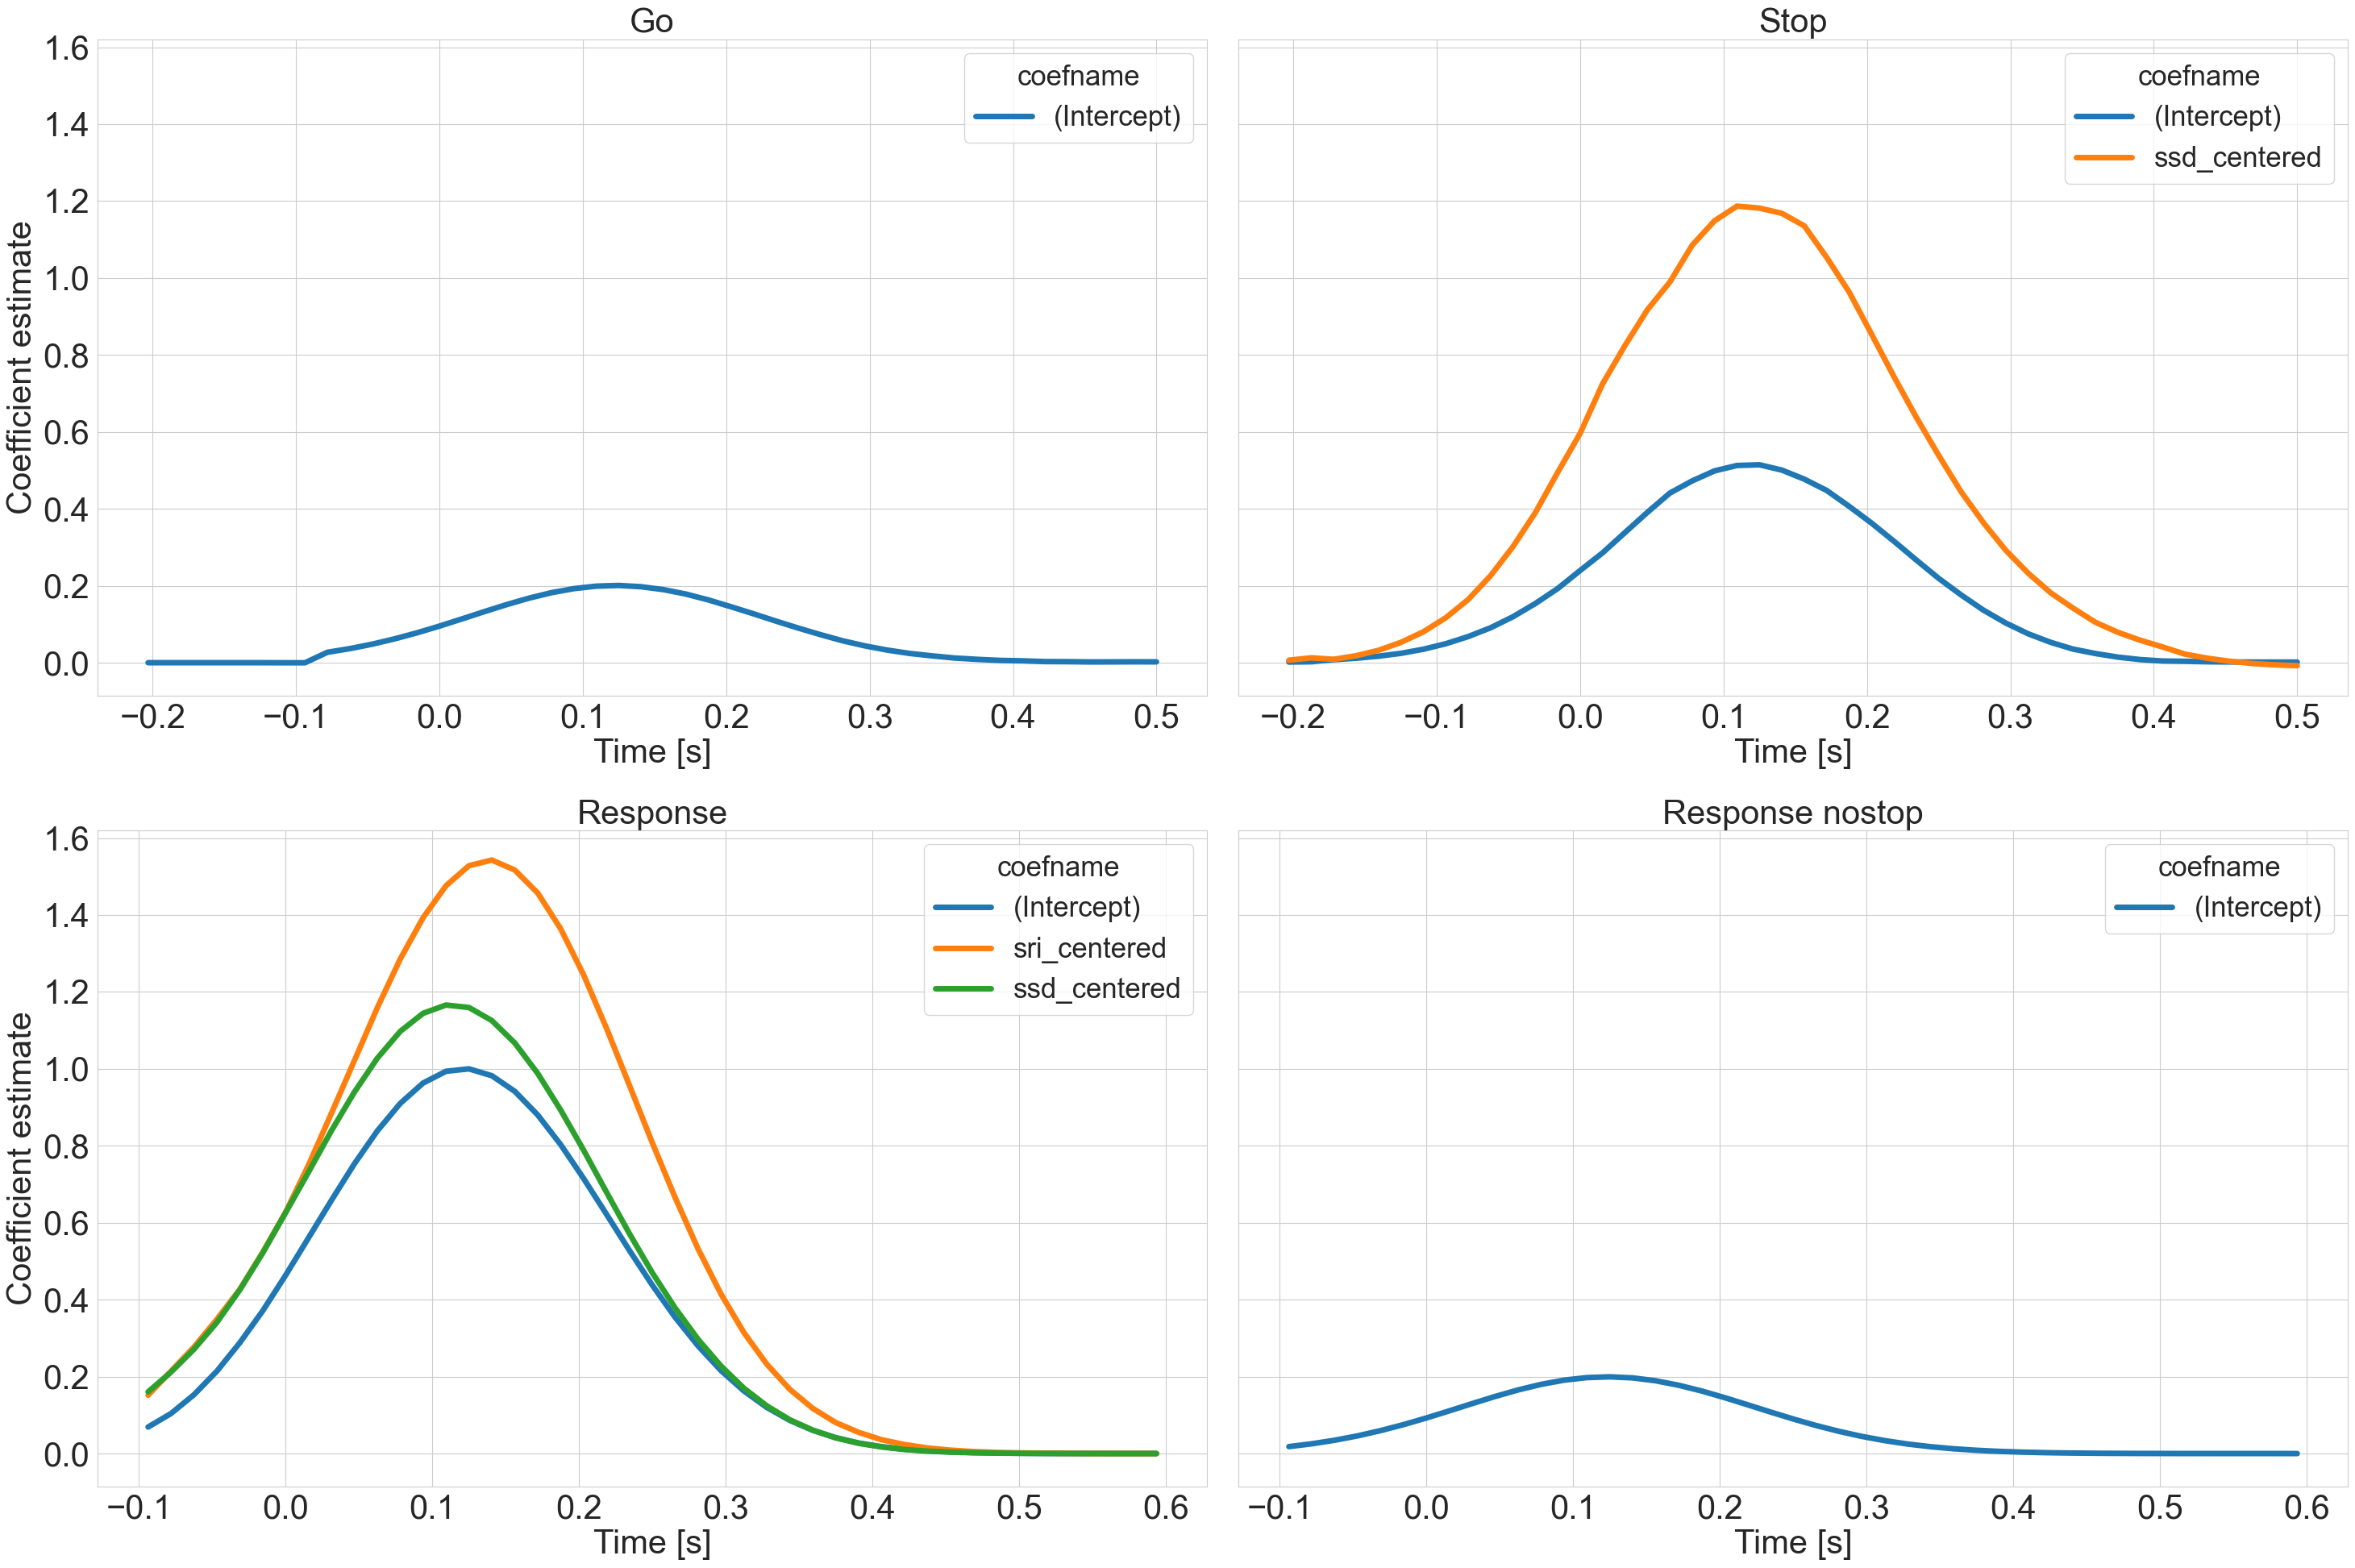

In [20]:
# Extract the coefficients for one channel
results_channel = results_py[results_py.channel == 1]

results_go = results_channel[results_channel.eventname == 'go']
results_stop = results_channel[results_channel.eventname == 'stop']
results_response = results_channel[results_channel.eventname == 'response']
results_response_nostop = results_channel[results_channel.eventname == 'response_nostop']

sns.set_style("whitegrid")

# Set global font size for various elements
plt.rcParams.update({
    'font.size': 25,
    'axes.titlesize': 30,
    'axes.labelsize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'legend.fontsize': 25,
    'figure.titlesize': 25,
})
linewidth = 5
# Plot the coefficient estimates over time
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20), sharey=True)

ax1 = sns.lineplot(
    x = results_go.time,
    y=results_go.estimate,
    hue=results_go.coefname,
    ax=ax1,
    linewidth=linewidth
)
ax1.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Go')

ax2 = sns.lineplot(
    x = results_stop.time,
    y=results_stop.estimate,
    hue=results_stop.coefname,
    ax=ax2,
    linewidth=linewidth
)
ax2.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Stop')

ax3 = sns.lineplot(
    x = results_response.time,
    y=results_response.estimate,
    hue=results_response.coefname,
    ax=ax3,
    linewidth=linewidth
)
ax3.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Response')

ax4 = sns.lineplot(
    x = results_response_nostop.time,
    y=results_response_nostop.estimate,
    hue=results_response_nostop.coefname,
    ax=ax4,
    linewidth=linewidth
)
ax4.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Response nostop')


plt.tight_layout()
plt.show()